# 2.2 Hierarchical Data and the Closure Property

As we have seen, pairs provide a primitive “glue” that we can use to construct compound data objects. [Figure 2.2](#Figure-2_002e2) shows a standard way to visualize a pair—in this case, the pair formed by `(cons 1 2)`. In this representation, which is called *box-and-pointer notation*, each object is shown as a *pointer* to a box. The box for a primitive object contains a representation of the object. For example, the box for a number contains a numeral. The box for a pair is actually a double box, the left part containing (a pointer to) the `car` of the pair and the right part containing the `cdr`.

![](fig/chap2/Fig2.2e.std.svg)
**Figure 2.2:** Box-and-pointer representation of `(cons 1 2)`.

We have already seen that `cons` can be used to combine not only numbers but pairs as well. (You made use of this fact, or should have, in doing [Exercise 2.2](2_002e1.xhtml#Exercise-2_002e2) and [Exercise 2.3](2_002e1.xhtml#Exercise-2_002e3).) As a consequence, pairs provide a universal building block from which we can construct all sorts of data structures. [Figure 2.3](#Figure-2_002e3) shows two ways to use pairs to combine the numbers 1, 2, 3, and 4.

![](fig/chap2/Fig2.3e.std.svg)
**Figure 2.3:** Two ways to combine 1, 2, 3, and 4 using pairs.

The ability to create pairs whose elements are pairs is the essence of list structure’s importance as a representational tool. We refer to this ability as the *closure property* of `cons`. In general, an operation for combining data objects satisfies the closure property if the results of combining things with that operation can themselves be combined using the same operation.

> The use of the word “closure” here comes from abstract algebra, where a set of elements is said to be closed under an operation if applying the operation to elements in the set produces an element that is again an element of the set. The Lisp community also (unfortunately) uses the word “closure” to describe a totally unrelated concept: A closure is an implementation technique for representing procedures with free variables. We do not use the word “closure” in this second sense in this book.

Closure is the key to power in any means of combination because it permits us to create *hierarchical* structures—structures made up of parts, which themselves are made up of parts, and so on.

From the outset of [Chapter 1](Chapter-1.xhtml#Chapter-1), we’ve made essential use of closure in dealing with procedures, because all but the very simplest programs rely on the fact that the elements of a combination can themselves be combinations. In this section, we take up the consequences of closure for compound data. We describe some conventional techniques for using pairs to represent sequences and trees, and we exhibit a graphics language that illustrates closure in a vivid way.

> The notion that a means of combination should satisfy closure is a straightforward idea. Unfortunately, the data combiners provided in many popular programming languages do not satisfy closure, or make closure cumbersome to exploit. In Fortran or Basic, one typically combines data elements by assembling them into arrays—but one cannot form arrays whose elements are themselves arrays. Pascal and C admit structures whose elements are structures. However, this requires that the programmer manipulate pointers explicitly, and adhere to the restriction that each field of a structure can contain only elements of a prespecified form. Unlike Lisp with its pairs, these languages have no built-in general-purpose glue that makes it easy to manipulate compound data in a uniform way. This limitation lies behind Alan Perlis’s comment in his foreword to this book: “In Pascal the plethora of declarable data structures induces a specialization within functions that inhibits and penalizes casual cooperation. It is better to have 100 functions operate on one data structure than to have 10 functions operate on 10 data structures.”]


## 2.2.1 Representing Sequences

One of the useful structures we can build with pairs is a *sequence*—an ordered collection of data objects. There are, of course, many ways to represent sequences in terms of pairs. One particularly straightforward representation is illustrated in [Figure 2.4](#Figure-2_002e4), where the sequence 1, 2, 3, 4 is represented as a chain of pairs. The `car` of each pair is the corresponding item in the chain, and the `cdr` of the pair is the next pair in the chain. The `cdr` of the final pair signals the end of the sequence by pointing to a distinguished value that is not a pair, represented in box-and-pointer diagrams as a diagonal line and in programs as the value of the variable `nil`. The entire sequence is constructed by nested `cons` operations:

In [ ]:
(cons 1
      (cons 2
            (cons 3
                  (cons 4 nil))))

![](fig/chap2/Fig2.4e.std.svg 587.4x141.96)
**Figure 2.4:** The sequence 1, 2, 3, 4 represented as a chain of pairs.

Such a sequence of pairs, formed by nested `cons`es, is called a *list*, and Scheme provides a primitive called `list` to help in constructing lists.^[In this book, we use *list* to mean a chain of pairs terminated by the end-of-list marker. In contrast, the term *list structure* refers to any data structure made out of pairs, not just to lists.] The above sequence could be produced by `(list 1 2 3 4)`. In general,

In [ ]:
(list ⟨a₁⟩ ⟨a₂⟩ … ⟨aₙ⟩)

is equivalent to

In [ ]:
(cons ⟨a₁⟩
      (cons ⟨a₂⟩
            (cons …
                  (cons ⟨aₙ⟩
                        nil)…)))

Lisp systems conventionally print lists by printing the sequence of elements, enclosed in parentheses. Thus, the data object in [Figure 2.4](#Figure-2_002e4) is printed as `(1 2 3 4)`:

In [ ]:
(define one-through-four (list 1 2 3 4))

one-through-four
(1 2 3 4)

Be careful not to confuse the expression `(list 1 2 3 4)` with the list `(1 2 3 4)`, which is the result obtained when the expression is evaluated. Attempting to evaluate the expression `(1 2 3 4)` will signal an error when the interpreter tries to apply the procedure `1` to arguments `2`, `3`, `4`.

We can think of `car` as selecting the first item in the list, and of `cdr` as selecting the sublist consisting of all but the first item. Nested applications of `car` and `cdr` can be used to extract the second, third, and subsequent items in the list.^[Since nested applications of `car` and `cdr` are cumbersome to write, Lisp dialects provide abbreviations for them—for instance,] The constructor `cons` makes a list like the original one, but with an additional item at the beginning.

In [ ]:
(car one-through-four)
1

(cdr one-through-four)
(2 3 4)

(car (cdr one-through-four))
2

(cons 10 one-through-four)
(10 1 2 3 4)

(cons 5 one-through-four)
(5 1 2 3 4)

The value of `nil`, used to terminate the chain of pairs, can be thought of as a sequence of no elements, the *empty list*. The word *nil* is a contraction of the Latin word *nihil*, which means “nothing.”^[It’s remarkable how much energy in the standardization of Lisp dialects has been dissipated in arguments that are literally over nothing: Should `nil` be an ordinary name? Should the value of `nil` be a symbol? Should it be a list? Should it be a pair? In Scheme, `nil` is an ordinary name, which we use in this section as a variable whose value is the end-of-list marker (just as `true` is an ordinary variable that has a true value). Other dialects of Lisp, including Common Lisp, treat `nil` as a special symbol. The authors of this book, who have endured too many language standardization brawls, would like to avoid the entire issue. Once we have introduced quotation in [2.3](2_002e3.xhtml#g_t2_002e3), we will denote the empty list as `'()` and dispense with the variable `nil` entirely.]


### List operations

The use of pairs to represent sequences of elements as lists is accompanied by conventional programming techniques for manipulating lists by successively “`cdr`ing down” the lists. For example, the procedure `list-ref` takes as arguments a list and a number $n$ and returns the $n^{\text{th}}$ item of the list. It is customary to number the elements of the list beginning with 0. The method for computing `list-ref` is the following:

- For $n = 0$, `list-ref` should return the `car` of the list.
- Otherwise, `list-ref` should return the $(n - 1)$-st item of the `cdr` of the list.

In [ ]:
(define (list-ref items n)
  (if (= n 0)
      (car items)
      (list-ref (cdr items) 
                (- n 1))))

(define squares 
  (list 1 4 9 16 25))

(list-ref squares 3)
16

Often we `cdr` down the whole list. To aid in this, Scheme includes a primitive predicate `null?`, which tests whether its argument is the empty list. The procedure `length`, which returns the number of items in a list, illustrates this typical pattern of use:

In [ ]:
(define (length items)
  (if (null? items)
      0
      (+ 1 (length (cdr items)))))

(define odds
  (list 1 3 5 7))

(length odds)
4

The `length` procedure implements a simple recursive plan. The reduction step is:

- The `length` of any list is 1 plus the `length` of the `cdr` of the list.

This is applied successively until we reach the base case:

- The `length` of the empty list is 0.

We could also compute `length` in an iterative style:

In [ ]:
(define (length items)
  (define (length-iter a count)
    (if (null? a)
        count
        (length-iter (cdr a) 
                     (+ 1 count))))
  (length-iter items 0))

Another conventional programming technique is to “`cons` up” an answer list while `cdr`ing down a list, as in the procedure `append`, which takes two lists as arguments and combines their elements to make a new list:

In [ ]:
(append squares odds)
(1 4 9 16 25 1 3 5 7)

(append odds squares)
(1 3 5 7 1 4 9 16 25)

`Append` is also implemented using a recursive plan. To `append` lists `list1` and `list2`, do the following:

- If `list1` is the empty list, then the result is just `list2`.
- Otherwise, `append` the `cdr` of `list1` and `list2`, and `cons` the `car` of `list1` onto the result:

In [ ]:
(define (append list1 list2)
  (if (null? list1)
      list2
      (cons (car list1) 
            (append (cdr list1) 
                    list2))))

**Exercise 2.17:** Define a procedure `last-pair` that returns the list that contains only the last element of a given (nonempty) list:

```scheme
(last-pair (list 23 72 149 34))
(34)
```

In [4]:
(define (last-pair lst)
  (if (null? (cdr lst))
      lst
      (last-pair (cdr lst))))
  
(display (last-pair (list 23 72 149 34)))

(34)

**Exercise 2.18:** Define a procedure `reverse` that takes a list as argument and returns a list of the same elements in reverse order:

```scheme
(reverse (list 1 4 9 16 25))
(25 16 9 4 1)
```

In [32]:
(define (reverse l)
  (if (null? l)
      '()
      (append (reverse (cdr l)) (list (car l)))))
  
(reverse (list 1 4 9 16 25))

(25 16 9 4 1)

**Exercise 2.19:** Consider the change-counting program of [1.2.2](1_002e2.xhtml#g_t1_002e2_002e2). It would be nice to be able to easily change the currency used by the program, so that we could compute the number of ways to change a British pound, for example. As the program is written, the knowledge of the currency is distributed partly into the procedure `first-denomination` and partly into the procedure `count-change` (which knows that there are five kinds of U.S. coins). It would be nicer to be able to supply a list of coins to be used for making change.

We want to rewrite the procedure `cc` so that its second argument is a list of the values of the coins to use rather than an integer specifying which coins to use. We could then have lists that defined each kind of currency:

In [2]:
(define us-coins 
  (list 50 25 10 5 1))

(define uk-coins 
  (list 100 50 20 10 5 2 1 0.5))

We could then call `cc` as follows:

In [ ]:
(cc 100 us-coins)
292

To do this will require changing the program `cc` somewhat. It will still have the same form, but it will access its second argument differently, as follows:

In [3]:
(define (cc amount coin-values)
  (cond ((= amount 0) 
         1)
        ((or (< amount 0) 
             (no-more? coin-values)) 
         0)
        (else
         (+ (cc 
             amount
             (except-first-denomination 
              coin-values))
            (cc 
             (- amount
                (first-denomination 
                 coin-values))
             coin-values)))))

Define the procedures `first-denomination`, `except-first-denomination` and `no-more?` in terms of primitive operations on list structures. Does the order of the list `coin-values` affect the answer produced by `cc`? Why or why not?

In [8]:
(define (first-denomination l) (car l))

(define (except-first-denomination l) (cdr l))

(define (no-more? l) (null? l))

(cc 100 us-coins)

;; order not affect answer

292

<div class="alert alert-warning">hard</div>

**Exercise 2.20:** The procedures `+`, `*`, and `list` take arbitrary numbers of arguments. One way to define such procedures is to use `define` with *dotted-tail notation*. In a procedure definition, a parameter list that has a dot before the last parameter name indicates that, when the procedure is called, the initial parameters (if any) will have as values the initial arguments, as usual, but the final parameter’s value will be a *list* of any remaining arguments. For instance, given the definition

```scheme
(define (f x y . z) ⟨body⟩)
```

the procedure `f` can be called with two or more arguments. If we evaluate

```scheme
(f 1 2 3 4 5 6)
```

then in the body of `f`, `x` will be 1, `y` will be 2, and `z` will be the list `(3 4 5 6)`. Given the definition

```scheme
(define (g . w) ⟨body⟩)
```

the procedure `g` can be called with zero or more arguments. If we evaluate

```scheme
(g 1 2 3 4 5 6)
```

then in the body of `g`, `w` will be the list `(1 2 3 4 5 6)`.

>To define `f` and `g` using `lambda` we would write

Use this notation to write a procedure `same-parity` that takes one or more integers and returns a list of all the arguments that have the same even-odd parity as the first argument. For example,

```scheme
(same-parity 1 2 3 4 5 6 7)
(1 3 5 7)

(same-parity 2 3 4 5 6 7)
(2 4 6)
```

In [12]:
(define (same-parity first . rest) 
  (define (same-parity-iter source dist remainder-val) 
    (if (null? source) 
        dist 
        (same-parity-iter (cdr source) 
                          (if (= (remainder (car source) 2) remainder-val) 
                              (append dist (list (car source))) 
                              dist) 
                          remainder-val))) 
  (same-parity-iter rest (list first) (remainder first 2))) 

### Mapping over lists

One extremely useful operation is to apply some transformation to each element in a list and generate the list of results. For instance, the following procedure scales each number in a list by a given factor:

In [ ]:
(define (scale-list items factor)
  (if (null? items)
      nil
      (cons (* (car items) factor)
            (scale-list (cdr items) 
                        factor))))

(scale-list (list 1 2 3 4 5) 10)
(10 20 30 40 50)

We can abstract this general idea and capture it as a common pattern expressed as a higher-order procedure, just as in [1.3](1_002e3.xhtml#g_t1_002e3). The higher-order procedure here is called `map`. `Map` takes as arguments a procedure of one argument and a list, and returns a list of the results produced by applying the procedure to each element in the list:
> cheme standardly provides a `map` procedure that is more general than the one described here. This more general `map` takes a procedure of $n$ arguments, together with $n$ lists, and applies the procedure to all the first elements of the lists, all the second elements of the lists, and so on, returning a list of the results. For example:

In [ ]:
(define (map proc items)
  (if (null? items)
      nil
      (cons (proc (car items))
            (map proc (cdr items)))))

(map abs (list -10 2.5 -11.6 17))
(10 2.5 11.6 17)

(map (lambda (x) (* x x)) (list 1 2 3 4))
(1 4 9 16)

Now we can give a new definition of `scale-list` in terms of `map`:

In [ ]:
(define (scale-list items factor)
  (map (lambda (x) (* x factor))
       items))

`Map` is an important construct, not only because it captures a common pattern, but because it establishes a higher level of abstraction in dealing with lists. In the original definition of `scale-list`, the recursive structure of the program draws attention to the element-by-element processing of the list. Defining `scale-list` in terms of `map` suppresses that level of detail and emphasizes that scaling transforms a list of elements to a list of results. The difference between the two definitions is not that the computer is performing a different process (it isn’t) but that we think about the process differently. In effect, `map` helps establish an abstraction barrier that isolates the implementation of procedures that transform lists from the details of how the elements of the list are extracted and combined. Like the barriers shown in [Figure 2.1](2_002e1.xhtml#Figure-2_002e1), this abstraction gives us the flexibility to change the low-level details of how sequences are implemented, while preserving the conceptual framework of operations that transform sequences to sequences. Section [2.2.3](#g_t2_002e2_002e3) expands on this use of sequences as a framework for organizing programs.

**Exercise 2.21:** The procedure `square-list` takes a list of numbers as argument and returns a list of the squares of those numbers.

```scheme
(square-list (list 1 2 3 4))
(1 4 9 16)
```

Here are two different definitions of `square-list`. Complete both of them by filling in the missing expressions:

```scheme
(define (square-list items)
  (if (null? items)
      nil
      (cons ⟨??⟩ ⟨??⟩)))

(define (square-list items)
  (map ⟨??⟩ ⟨??⟩))
```

In [15]:
(define (square x) (* x x))

In [17]:
(define (square-list items)
  (if (null? items)
      '()
      (cons (square (car items)) (square-list (cdr items)) )))
(square-list (list 1 2 3 4))

(1 4 9 16)

In [18]:
(define (square-list items)
  (map square items))

(square-list (list 1 2 3 4))

(1 4 9 16)

**Exercise 2.22:** Louis Reasoner tries to rewrite the first `square-list` procedure of [Exercise 2.21](#Exercise-2_002e21) so that it evolves an iterative process:

In [21]:
(define (square-list items)
  (define (iter things answer)
    (if (null? things)
        answer
        (iter (cdr things)
              (cons (square (car things))
                    answer))))
  (iter items '()))
(square-list (list 1 2 3 4))

(16 9 4 1)

Unfortunately, defining `square-list` this way produces the answer list in the reverse order of the one desired. Why?

Louis then tries to fix his bug by interchanging the arguments to `cons`:

In [22]:
(define (square-list items)
  (define (iter things answer)
    (if (null? things)
        answer
        (iter (cdr things)
              (cons answer
                    (square 
                     (car things))))))
  (iter items '()))
(square-list (list 1 2 3 4))

((((() . 1) . 4) . 9) . 16)

This doesn’t work either. Explain.

In [52]:
;; fix for v1
(define (square-list items)
  (define (iter things answer)
    (if (null? things)
        (reverse answer)
        (iter (cdr things) (cons (square (car things)) answer))))
  (iter items '()))
(display (square-list (list 1 2 3 4)))


;; fix for v2
(define (square-list items)
  (define (iter things answer)
    (if (null? things)
        answer
        (iter (cdr things)
              (append answer (list (square (car things)))))))
  (iter items '()))
(display (square-list (list 1 2 3 4)))

(1 4 9 16)(1 4 9 16)


**Exercise 2.23:** The procedure `for-each` is similar to `map`. It takes as arguments a procedure and a list of elements. However, rather than forming a list of the results, `for-each` just applies the procedure to each of the elements in turn, from left to right. The values returned by applying the procedure to the elements are not used at all—`for-each` is used with procedures that perform an action, such as printing. For example,

```scheme
(for-each 
 (lambda (x) (newline) (display x))
 (list 57 321 88))

57
321
88
```

The value returned by the call to `for-each` (not illustrated above) can be something arbitrary, such as true. Give an implementation of `for-each`.


In [71]:
(define (my-for-each f l)
  (if (null? l)
      (display "")
      (and (f (car l)) (my-for-each f (cdr l)))))

(my-for-each 
 (lambda (x) (newline) (display x))
 (list 57 321 88))


57
321
88



## 2.2.2 Hierarchical Structures

The representation of sequences in terms of lists generalizes naturally to represent sequences whose elements may themselves be sequences. For example, we can regard the object `((1 2) 3 4)` constructed by

In [ ]:
(cons (list 1 2) (list 3 4))

as a list of three items, the first of which is itself a list, `(1 2)`. Indeed, this is suggested by the form in which the result is printed by the interpreter. [Figure 2.5](#Figure-2_002e5) shows the representation of this structure in terms of pairs.

<img src="fig/chap2/Fig2.5e.std.svg" alt="image" width="500" height="500">


**Figure 2.5:** Structure formed by `(cons (list 1 2) (list 3 4))`.

Another way to think of sequences whose elements are sequences is as *trees*. The elements of the sequence are the branches of the tree, and elements that are themselves sequences are subtrees. [Figure 2.6](#Figure-2_002e6) shows the structure in [Figure 2.5](#Figure-2_002e5) viewed as a tree.


<img src="fig/chap2/Fig2.6b.std.svg" alt="image" width="100" align="left">


**Figure 2.6:** The list structure in [Figure 2.5](#Figure-2_002e5) viewed as a tree.

Recursion is a natural tool for dealing with tree structures, since we can often reduce operations on trees to operations on their branches, which reduce in turn to operations on the branches of the branches, and so on, until we reach the leaves of the tree. As an example, compare the `length` procedure of [2.2.1](#g_t2_002e2_002e1) with the `count-leaves` procedure, which returns the total number of leaves of a tree:

In [ ]:
(define x (cons (list 1 2) (list 3 4)))

In [ ]:
(length x)
3

In [ ]:
(count-leaves x)
4

(list x x)
(((1 2) 3 4) ((1 2) 3 4))

(length (list x x))
2

(count-leaves (list x x))
8

To implement `count-leaves`, recall the recursive plan for computing `length`:

- `Length` of a list `x` is 1 plus `length` of the `cdr` of `x`.
- `Length` of the empty list is 0.

`Count-leaves` is similar. The value for the empty list is the same:

- `Count-leaves` of the empty list is 0.

But in the reduction step, where we strip off the `car` of the list, we must take into account that the `car` may itself be a tree whose leaves we need to count. Thus, the appropriate reduction step is

- `Count-leaves` of a tree `x` is `count-leaves` of the `car` of `x` plus `count-leaves` of the `cdr` of `x`.

Finally, by taking `car`s we reach actual leaves, so we need another base case:

- `Count-leaves` of a leaf is 1.

To aid in writing recursive procedures on trees, Scheme provides the primitive predicate `pair?`, which tests whether its argument is a pair. Here is the complete procedure:^[The order of the first two clauses in the `cond` matters, since the empty list satisfies `null?` and also is not a pair.]

In [ ]:
(define (count-leaves x)
  (cond ((null? x) 0)
        ((not (pair? x)) 1)
        (else (+ (count-leaves (car x))
                 (count-leaves (cdr x))))))

**Exercise 2.24:** Suppose we evaluate the expression `(list 1 (list 2 (list 3 4)))`. Give the result printed by the interpreter, the corresponding box-and-pointer structure, and the interpretation of this as a tree (as in [Figure 2.6](#Figure-2_002e6)).

In [72]:
(list 1 (list 2 (list 3 4)))

(1 (2 (3 4)))


**Exercise 2.25:** Give combinations of `car`s and `cdr`s that will pick 7 from each of the following lists:

```
(1 3 (5 7) 9)
((7))
(1 (2 (3 (4 (5 (6 7))))))
```

In [105]:
(define x '(1 3 (5 7) 9))
(car (cdr (car (cdr (cdr x)))))

(define x '((7)))
(car (car x))

(define x '(1 (2 (3 (4 (5 (6 7)))))))
(car (cdr (car (cdr (car (cdr (car (cdr (car (cdr (car (cdr x))))))))))))

7

**Exercise 2.26:** Suppose we define `x` and `y` to be two lists:

In [74]:
(define x (list 1 2 3))
(define y (list 4 5 6))

What result is printed by the interpreter in response to evaluating each of the following expressions:

In [75]:
(append x y)
(cons x y)
(list x y)

((1 2 3) (4 5 6))

In [80]:
(display (append x y))(newline)
(display (cons x y))(newline) ;; Im wrong this one
(display (list x y))(newline)
(display (cons '(1 2) '(3 4)))

(1 2 3 4 5 6)
((1 2 3) 4 5 6)
((1 2 3) (4 5 6))
((1 2) 3 4)

<div class="alert alert-success">

__What's wrong with `cons`__

In Scheme, `cons` is a primitive procedure that creates a new pair from two values. The first value becomes the first element of the pair, and the second value becomes the second element of the pair. 

When you call `cons` with two arguments, it creates a new pair whose first element is the first argument and whose second element is the second argument. For example, `(cons 1 2)` creates a new pair whose first element is `1` and whose second element is `2`.

When you call `cons` with a single argument, it creates a new pair whose first element is the single argument and whose second element is `null`. For example, `(cons 1)` creates a new pair whose first element is `1` and whose second element is `null`.

If you call `cons` with two lists as arguments, the result is a new list that consists of the first list followed by the second list. For example, `(cons '(1 2) '(3 4))` creates a new list `(1 2 3 4)`.

However, if you call `cons` with a single list as the first argument and a non-list value as the second argument, the result is a pair whose first element is the list and whose second element is the non-list value. For example, `(cons '(1 2) 3)` creates a new pair whose first element is `(1 2)` and whose second element is `3`. This is not a list because the second element is not a list.

**Exercise 2.27:** Modify your `reverse` procedure of [Exercise 2.18](#Exercise-2_002e18) to produce a `deep-reverse` procedure that takes a list as argument and returns as its value the list with its elements reversed and with all sublists deep-reversed as well. For example,

In [110]:
(define x 
  (list (list 1 2) (list 3 4)))

```scheme
x
((1 2) (3 4))

(reverse x)
((3 4) (1 2))

(deep-reverse x)
((4 3) (2 1))
```

In [113]:
(define (deep-reverse l)
  (if (null? l)
      '()
      (append 
       (deep-reverse (cdr l)) 
       (list (reverse (car l))))))
  
(deep-reverse x)

((4 3) (2 1))

**Exercise 2.28:** Write a procedure `fringe` that takes as argument a tree (represented as a list) and returns a list whose elements are all the leaves of the tree arranged in left-to-right order. For example,

In [114]:
(define x 
  (list (list 1 2) (list 3 4)))

```scheme
(fringe x)
(1 2 3 4)

(fringe (list x x))
(1 2 3 4 1 2 3 4)
```

In [116]:
(define (fringe lst)
  (cond ((null? lst) '())
        ((not (pair? lst)) (list lst))
        (else (append (fringe (car lst)) (fringe (cdr lst))))))  
(fringe '(1 2 (3 4) 5 (6 (7 8) 9)))

(1 2 3 4 5 6 7 8 9)

**Exercise 2.29:** A binary mobile consists of two branches, a left branch and a right branch. Each branch is a rod of a certain length, from which hangs either a weight or another binary mobile. We can represent a binary mobile using compound data by constructing it from two branches (for example, using `list`):

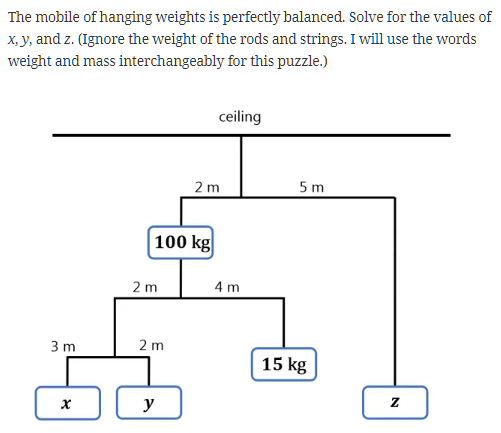

In [47]:
(define (make-mobile left right)
  (list left right))

A branch is constructed from a `length` (which must be a number) together with a `structure`, which may be either a number (representing a simple weight) or another mobile:

In [48]:
(define (make-branch length structure)
  (list length structure))

1.  Write the corresponding selectors `left-branch` and `right-branch`, which return the branches of a mobile, and `branch-length` and `branch-structure`, which return the components of a branch.

In [49]:
(define (left-branch m) (car m))
(define (right-branch m) (car (cdr m)))
(define (branch-length b) (car b))
(define (branch-structure b) (car (cdr b)))

2.  Using your selectors, define a procedure `total-weight` that returns the total weight of a mobile.

In [60]:
(define (total-weight m)
  (cond ((null? m) 0)
        ((not (pair? m)) m)
        (else (+ (total-weight (branch-structure (left-branch m))) 
                 (total-weight (branch-structure (right-branch m))))))) 
  
;; Test  
(define t1 (make-mobile (make-branch 1 3) (make-branch 2 3))) ;;6
(total-weight t1)

6

3.  A mobile is said to be *balanced* if the torque applied by its top-left branch is equal to that applied by its top-right branch (that is, if the length of the left rod multiplied by the weight hanging from that rod is equal to the corresponding product for the right side) and if each of the submobiles hanging off its branches is balanced. Design a predicate that tests whether a binary mobile is balanced.

In [61]:
(define (torque b) 
   (* (branch-length b) 
      (total-weight (branch-structure b))))

(define (balanced? m)
  (if (not (pair? m))
      #t
      (and (= (torque (left-branch m)) (torque (right-branch m)))
           (balanced? (branch-structure (left-branch m))) 
           (balanced? (branch-structure (right-branch m))))))

4.  Suppose we change the representation of mobiles so that the constructors are

```scheme
(define (make-mobile left right)
  (cons left right))

(define (make-branch length structure)
  (cons length structure))
```

How much do you need to change your programs to convert to the new representation?


In [62]:
;; Change for mobile
(define (make-mobile left right)
  (cons left right))
(define (left-branch m) (car m))
(define (right-branch m) (cdr m))

;; Change for branch
(define (make-branch length structure)
  (cons length structure))
(define (branch-length b) (car b))
(define (branch-structure b) (cdr b))

In [63]:
;; Test
(define t2 (make-mobile (make-branch 10 t1) (make-branch 12 5)))
(define t3 (make-mobile (make-branch 10 6) (make-branch 12 5)))

(define t4 (make-mobile (make-branch 2 3) (make-branch 2 3)))
(define t5 (make-mobile (make-branch 10 t4) (make-branch 12 5)))

(display (balanced? t2))(newline) ;; #f
(display (balanced? t3))(newline) ;; #t
(display (balanced? t5))(newline) ;; #t

False
True
True


### Mapping over trees

Just as `map` is a powerful abstraction for dealing with sequences, `map` together with recursion is a powerful abstraction for dealing with trees. For instance, the `scale-tree` procedure, analogous to `scale-list` of [2.2.1](#g_t2_002e2_002e1), takes as arguments a numeric factor and a tree whose leaves are numbers. It returns a tree of the same shape, where each number is multiplied by the factor. The recursive plan for `scale-tree` is similar to the one for `count-leaves`:

In [65]:
(define (scale-tree tree factor)
  (cond ((null? tree) '())
        ((not (pair? tree)) 
         (* tree factor))
        (else
         (cons (scale-tree (car tree) 
                           factor)
               (scale-tree (cdr tree) 
                           factor)))))

(scale-tree (list 1 
                  (list 2 (list 3 4) 5) 
                  (list 6 7))
            10)

(10 (20 (30 40) 50) (60 70))

Another way to implement `scale-tree` is to regard the tree as a sequence of sub-trees and use `map`. We map over the sequence, scaling each sub-tree in turn, and return the list of results. In the base case, where the tree is a leaf, we simply multiply by the factor:

In [ ]:
(define (scale-tree tree factor)
  (map (lambda (sub-tree)
         (if (pair? sub-tree)
             (scale-tree sub-tree factor)
             (* sub-tree factor)))
       tree))

Many tree operations can be implemented by similar combinations of sequence operations and recursion.

**Exercise 2.30:** Define a procedure `square-tree` analogous to the `square-list` procedure of [Exercise 2.21](#Exercise-2_002e21). That is, `square-tree` should behave as follows:

```scheme
(square-tree
 (list 1
       (list 2 (list 3 4) 5)
       (list 6 7)))
(1 (4 (9 16) 25) (36 49))
```

Define `square-tree` both directly (i.e., without using any higher-order procedures) and also by using `map` and recursion.

In [75]:
;; Directly
(define (square x) (* x x))
(define (square-tree tree)
  (cond ((null? tree) '())
        ((not (pair? tree)) (square tree))
        (else (cons (square-tree (car tree))
                    (square-tree (cdr tree))))))

;; Map
(define (square-tree-map tree)
  (map (lambda (sub)
         (if (pair? sub)
             (square-tree-map sub)
             (square sub)))
       tree))

(display (square-tree (list 1 (list 2 (list 3 4) 5) (list 6 7))))(newline)
(display (square-tree-map (list 1 (list 2 (list 3 4) 5) (list 6 7))))

(1 (4 (9 16) 25) (36 49))
(1 (4 (9 16) 25) (36 49))


**Exercise 2.31:** Abstract your answer to [Exercise 2.30](#Exercise-2_002e30) to produce a procedure `tree-map` with the property that `square-tree` could be defined as

In [ ]:
(define (square-tree tree) 
  (tree-map square tree))

In [85]:
;; My Code
(define (tree-map f tree)
  (map (lambda (sub)
         (if (pair? sub)
             (tree-map f sub)
             (f sub)))
       tree))

(display 
 (square-tree (list 1 (list 2 (list 3 4) 5) (list 6 7))))

(1 (4 (9 16) 25) (36 49))

**Exercise 2.32:** We can represent a set as a list of distinct elements, and we can represent the set of all subsets of the set as a list of lists. For example, if the set is `(1 2 3)`, then the set of all subsets is `(() (3) (2) (2 3) (1) (1 3) (1 2) (1 2 3))`. Complete the following definition of a procedure that generates the set of subsets of a set and give a clear explanation of why it works:

```scheme
(define (subsets s)
  (if (null? s)
      (list nil)
      (let ((rest (subsets (cdr s))))
        (append rest (map ⟨??⟩ rest)))))
```

In [101]:
(define (subsets s)
  (if (null? s)
      (list '())
      (let ((rest (subsets (cdr s))))
        (append rest (map (lambda (x) (cons (car s) x)) rest)))))

(subsets '(1 2 3))

(() (3) (2) (2 3) (1) (1 3) (1 2) (1 2 3))

__Note__:

The `subsets` function takes a list `s` as input and returns a list of all possible subsets of `s`. 

In the base case, when `s` is an empty list, the function returns a list containing a single element, the empty list `nil`. 

In the recursive case, the function first calls itself recursively with the tail of the input list `s`, which returns a list of all possible subsets of the tail. 

Then, the function uses `map` to apply a function to each element of the list of subsets of the tail. The function being applied is a lambda function that takes a subset `x` and returns a new subset that includes the first element of the input list `s` concatenated with `x`. 

This lambda function is used to generate all possible subsets that include the first element of `s`. The resulting list of subsets is then appended to the list of subsets generated from the tail of `s`, giving the final list of all possible subsets of `s`.

## 2.2.3 Sequences as Conventional Interfaces

In working with compound data, we’ve stressed how data abstraction permits us to design programs without becoming enmeshed in the details of data representations, and how abstraction preserves for us the flexibility to experiment with alternative representations. In this section, we introduce another powerful design principle for working with data structures—the use of *conventional interfaces*.

In [1.3](1_002e3.xhtml#g_t1_002e3) we saw how program abstractions, implemented as higher-order procedures, can capture common patterns in programs that deal with numerical data. Our ability to formulate analogous operations for working with compound data depends crucially on the style in which we manipulate our data structures. Consider, for example, the following procedure, analogous to the `count-leaves` procedure of [2.2.2](#g_t2_002e2_002e2), which takes a tree as argument and computes the sum of the squares of the leaves that are odd:

In [ ]:
(define (sum-odd-squares tree)
  (cond ((null? tree) 0)
        ((not (pair? tree))
         (if (odd? tree) (square tree) 0))
        (else (+ (sum-odd-squares 
                  (car tree))
                 (sum-odd-squares 
                  (cdr tree))))))

On the surface, this procedure is very different from the following one, which constructs a list of all the even Fibonacci numbers $\text{Fib}(k)$, where $k$ is less than or equal to a given integer $n$:

In [ ]:
(define (even-fibs n)
  (define (next k)
    (if (> k n)
        nil
        (let ((f (fib k)))
          (if (even? f)
              (cons f (next (+ k 1)))
              (next (+ k 1))))))
  (next 0))

Despite the fact that these two procedures are structurally very different, a more abstract description of the two computations reveals a great deal of similarity. The first program

- enumerates the leaves of a tree;
- filters them, selecting the odd ones;
- squares each of the selected ones; and
- accumulates the results using `+`, starting with 0.

The second program

- enumerates the integers from 0 to $n$;
- computes the Fibonacci number for each integer;
- filters them, selecting the even ones; and
- accumulates the results using `cons`, starting with the empty list.

A signal-processing engineer would find it natural to conceptualize these processes in terms of signals flowing through a cascade of stages, each of which implements part of the program plan, as shown in [Figure 2.7](#Figure-2_002e7). In `sum-odd-squares`, we begin with an *enumerator*, which generates a “signal” consisting of the leaves of a given tree. This signal is passed through a *filter*, which eliminates all but the odd elements. The resulting signal is in turn passed through a *map*, which is a “transducer” that applies the `square` procedure to each element. The output of the map is then fed to an *accumulator*, which combines the elements using `+`, starting from an initial 0. The plan for `even-fibs` is analogous.

![](fig/chap2/Fig2.7e.std.svg)
**Figure 2.7:** The signal-flow plans for the procedures `sum-odd-squares` (top) and `even-fibs` (bottom) reveal the commonality between the two programs.

Unfortunately, the two procedure definitions above fail to exhibit this signal-flow structure. For instance, if we examine the `sum-odd-squares` procedure, we find that the enumeration is implemented partly by the `null?` and `pair?` tests and partly by the tree-recursive structure of the procedure. Similarly, the accumulation is found partly in the tests and partly in the addition used in the recursion. In general, there are no distinct parts of either procedure that correspond to the elements in the signal-flow description. Our two procedures decompose the computations in a different way, spreading the enumeration over the program and mingling it with the map, the filter, and the accumulation. If we could organize our programs to make the signal-flow structure manifest in the procedures we write, this would increase the conceptual clarity of the resulting code.


### Sequence Operations

The key to organizing programs so as to more clearly reflect the signal-flow structure is to concentrate on the “signals” that flow from one stage in the process to the next. If we represent these signals as lists, then we can use list operations to implement the processing at each of the stages. For instance, we can implement the mapping stages of the signal-flow diagrams using the `map` procedure from [2.2.1](#g_t2_002e2_002e1):

In [ ]:
(map square (list 1 2 3 4 5))
(1 4 9 16 25)

Filtering a sequence to select only those elements that satisfy a given predicate is accomplished by

In [5]:
(define (filter predicate sequence)
  (cond ((null? sequence) '())
        ((predicate (car sequence))
         (cons (car sequence)
               (filter predicate 
                       (cdr sequence))))
        (else  (filter predicate 
                       (cdr sequence)))))

For example,

In [7]:
(filter odd? (list 1 2 3 4 5))

(1 3 5)

Accumulations can be implemented by

In [8]:
(define (accumulate op initial sequence)
  (if (null? sequence)
      initial
      (op (car sequence)
          (accumulate op 
                      initial 
                      (cdr sequence)))))

```scheme
(accumulate + 0 (list 1 2 3 4 5))
15
(accumulate * 1 (list 1 2 3 4 5))
120
(accumulate cons '() (list 1 2 3 4 5))
(1 2 3 4 5)
```

All that remains to implement signal-flow diagrams is to enumerate the sequence of elements to be processed. For `even-fibs`, we need to generate the sequence of integers in a given range, which we can do as follows:

In [ ]:
(define (enumerate-interval low high)
  (if (> low high)
      nil
      (cons low 
            (enumerate-interval 
             (+ low 1) 
             high))))

(enumerate-interval 2 7)
(2 3 4 5 6 7)

To enumerate the leaves of a tree, we can use^[This is, in fact, precisely the `fringe` procedure from [Exercise 2.28](#Exercise-2_002e28). Here we’ve renamed it to emphasize that it is part of a family of general sequence-manipulation procedures.]

In [ ]:
(define (enumerate-tree tree)
  (cond ((null? tree) nil)
        ((not (pair? tree)) (list tree))
        (else (append 
               (enumerate-tree (car tree))
               (enumerate-tree (cdr tree))))))

(enumerate-tree (list 1 (list 2 (list 3 4)) 5))
(1 2 3 4 5)

Now we can reformulate `sum-odd-squares` and `even-fibs` as in the signal-flow diagrams. For `sum-odd-squares`, we enumerate the sequence of leaves of the tree, filter this to keep only the odd numbers in the sequence, square each element, and sum the results:

In [ ]:
(define (sum-odd-squares tree)
  (accumulate 
   +
   0
   (map square
        (filter odd?
                (enumerate-tree tree)))))

For `even-fibs`, we enumerate the integers from 0 to $n$, generate the Fibonacci number for each of these integers, filter the resulting sequence to keep only the even elements, and accumulate the results into a list:

In [ ]:
(define (even-fibs n)
  (accumulate 
   cons
   nil
   (filter even?
           (map fib
                (enumerate-interval 0 n)))))

The value of expressing programs as sequence operations is that this helps us make program designs that are modular, that is, designs that are constructed by combining relatively independent pieces. We can encourage modular design by providing a library of standard components together with a conventional interface for connecting the components in flexible ways.

Modular construction is a powerful strategy for controlling complexity in engineering design. In real signal-processing applications, for example, designers regularly build systems by cascading elements selected from standardized families of filters and transducers. Similarly, sequence operations provide a library of standard program elements that we can mix and match. For instance, we can reuse pieces from the `sum-odd-squares` and `even-fibs` procedures in a program that constructs a list of the squares of the first $n + 1$ Fibonacci numbers:

In [ ]:
(define (list-fib-squares n)
  (accumulate 
   cons
   nil
   (map square
        (map fib
             (enumerate-interval 0 n)))))

(list-fib-squares 10)
(0 1 1 4 9 25 64 169 441 1156 3025)

We can rearrange the pieces and use them in computing the product of the squares of the odd integers in a sequence:

In [ ]:
(define 
  (product-of-squares-of-odd-elements
   sequence)
  (accumulate 
   *
   1
   (map square (filter odd? sequence))))

(product-of-squares-of-odd-elements 
 (list 1 2 3 4 5))
225

We can also formulate conventional data-processing applications in terms of sequence operations. Suppose we have a sequence of personnel records and we want to find the salary of the highest-paid programmer. Assume that we have a selector `salary` that returns the salary of a record, and a predicate `programmer?` that tests if a record is for a programmer. Then we can write

In [ ]:
(define 
  (salary-of-highest-paid-programmer
   records)
  (accumulate 
   max
   0
   (map salary
        (filter programmer? records))))

These examples give just a hint of the vast range of operations that can be expressed as sequence operations.^[Richard [Waters (1979)](References.xhtml#Waters-_00281979_0029) developed a program that automatically analyzes traditional Fortran programs, viewing them in terms of maps, filters, and accumulations. He found that fully 90 percent of the code in the Fortran Scientific Subroutine Package fits neatly into this paradigm. One of the reasons for the success of Lisp as a programming language is that lists provide a standard medium for expressing ordered collections so that they can be manipulated using higher-order operations. The programming language APL owes much of its power and appeal to a similar choice. In APL all data are represented as arrays, and there is a universal and convenient set of generic operators for all sorts of array operations.]

Sequences, implemented here as lists, serve as a conventional interface that permits us to combine processing modules. Additionally, when we uniformly represent structures as sequences, we have localized the data-structure dependencies in our programs to a small number of sequence operations. By changing these, we can experiment with alternative representations of sequences, while leaving the overall design of our programs intact. We will exploit this capability in [3.5](3_002e5.xhtml#g_t3_002e5), when we generalize the sequence-processing paradigm to admit infinite sequences.

**Exercise 2.33:** Fill in the missing expressions to complete the following definitions of some basic list-manipulation operations as accumulations:

```scheme
(define (map p sequence)
  (accumulate (lambda (x y) ⟨??⟩) 
              nil sequence))

(define (append seq1 seq2)
  (accumulate cons ⟨??⟩ ⟨??⟩))

(define (length sequence)
  (accumulate ⟨??⟩ 0 sequence))
```

In [17]:
(define (map p sequence)
  (accumulate 
   (lambda (x y) (cons (p x) y)) '() sequence))

(define (square x) (* x x))
(map square '(1 2 3 4 5))

(1 4 9 16 25)

In [21]:
(define (append seq1 seq2)
  (accumulate cons seq2 seq1))

(append '(1 2) '(2 3))

(1 2 2 3)

In [23]:
(define (length sequence)
  (accumulate (lambda (x y) (+ y 1)) 0 sequence))

(display (length '(1 2 3)))(newline)
(display (length '()))(newline)

3
0


**Exercise 2.34:** Evaluating a polynomial in $x$ at a given value of $x$ can be formulated as an accumulation. We evaluate the polynomial 

$${a_{n}x^{n}} + {a_{n - 1}x^{n - 1}} + \cdots + {a_{1}x} + a_{0}$$

 using a well-known algorithm called *Horner’s rule*, which structures the computation as 

$${(\ldots(a_{n}x} + {a_{n - 1})x} + \cdots + {a_{1})x} + {a_{0}.}$$

 In other words, we start with $a_{n}$, multiply by $x$, add $a_{n - 1}$, multiply by $x$, and so on, until we reach $a_{0}$.^[According to [Knuth 1981](References.xhtml#Knuth-1981), this rule was formulated by W. G. Horner early in the nineteenth century, but the method was actually used by Newton over a hundred years earlier. Horner’s rule evaluates the polynomial using fewer additions and multiplications than does the straightforward method of first computing $a_{n}x^{n}$, then adding $a_{n - 1}x^{n - 1}$, and so on. In fact, it is possible to prove that any algorithm for evaluating arbitrary polynomials must use at least as many additions and multiplications as does Horner’s rule, and thus Horner’s rule is an optimal algorithm for polynomial evaluation. This was proved (for the number of additions) by A. M. Ostrowski in a 1954 paper that essentially founded the modern study of optimal algorithms. The analogous statement for multiplications was proved by V. Y. Pan in 1966. The book by [Borodin and Munro (1975)](References.xhtml#Borodin-and-Munro-_00281975_0029) provides an overview of these and other results about optimal algorithms.]

Fill in the following template to produce a procedure that evaluates a polynomial using Horner’s rule. Assume that the coefficients of the polynomial are arranged in a sequence, from $a_{0}$ through $a_{n}$.

```scheme
(define 
  (horner-eval x coefficient-sequence)
  (accumulate 
   (lambda (this-coeff higher-terms)
     ⟨??⟩)
   0
   coefficient-sequence))
```

For example, to compute ${1 + 3x} + {5x^{3} + x^{5}}$ at $x = 2$ you would evaluate

`(horner-eval 2 (list 1 3 0 5 0 1))`

In [34]:
(define 
  (horner-eval x coefficient-sequence)
  (accumulate 
   (lambda (this-coeff higher-terms) (+ this-coeff (* x higher-terms)))
   0
   coefficient-sequence))

(equal? 79 (horner-eval 2 (list 1 3 0 5 0 1)))

#t

**Exercise 2.35:** Redefine `count-leaves` from [2.2.2](#g_t2_002e2_002e2) as an accumulation:

```scheme
(define (count-leaves t)
  (accumulate ⟨??⟩ ⟨??⟩ (map ⟨??⟩ ⟨??⟩)))
```

In [35]:
(define (enumerate-tree tree)
    (cond ((null? tree) '())
          ((not (pair? tree)) (list tree))
          (else (append (enumerate-tree (car tree))
                        (enumerate-tree (cdr tree))))))

(define (count-leaves tree)
    (accumulate +
                0
                (map (lambda (x) 1) (enumerate-tree tree))))

(count-leaves (cons (list 1 2) (list 3 4)))

4

**Exercise 2.36:** The procedure `accumulate-n` is similar to `accumulate` except that it takes as its third argument a sequence of sequences, which are all assumed to have the same number of elements. It applies the designated accumulation procedure to combine all the first elements of the sequences, all the second elements of the sequences, and so on, and returns a sequence of the results. For instance, if `s` is a sequence containing four sequences, `((1 2 3) (4 5 6) (7 8 9) (10 11 12)),` then the value of `(accumulate-n + 0 s)` should be the sequence `(22 26 30)`. Fill in the missing expressions in the following definition of `accumulate-n`:

```scheme
(define (accumulate-n op init seqs)
  (if (null? (car seqs))
      nil
      (cons (accumulate op init ⟨??⟩)
            (accumulate-n op init ⟨??⟩))))
```

**Exercise 2.37:** Suppose we represent vectors **v** = $(v_{i})$ as sequences of numbers, and matrices **m** = $(m_{ij})$ as sequences of vectors (the rows of the matrix). For example, the matrix 

$$\left( \begin{array}{llll}
1 & 2 & 3 & 4 \\
4 & 5 & 6 & 6 \\
6 & 7 & 8 & 9 \\
\end{array} \right)$$

 is represented as the sequence `((1 2 3 4) (4 5 6 6) (6 7 8 9))`. With this representation, we can use sequence operations to concisely express the basic matrix and vector operations. These operations (which are described in any book on matrix algebra) are the following: 

$$\begin{array}{ll}
\text{(dot-product $v$ $w$)} & {\text{returns the sum}\;\Sigma_{i}v_{i}w_{i};} \\
\text{(matrix-*-vector $m$ $v$)} & {\text{returns the vector}\;\mathbf{t},} \\
 & {\text{where}\; t_{i} = \Sigma_{j}m_{ij}v_{j};} \\
\text{(matrix-*-matrix $m$ $n$)} & {\text{returns the matrix}\;\mathbf{p},} \\
 & {\text{where}\; p_{ij} = \Sigma_{k}m_{ik}n_{kj};} \\
\text{(transpose $m$)} & {\text{returns the matrix}\;\mathbf{n},} \\
 & {\text{where}\; n_{ij} = m_{ji}.} \\
\end{array}$$

 We can define the dot product as^[This definition uses the extended version of `map` described in [Footnote 78](#Footnote-78).]

In [ ]:
(define (dot-product v w)
  (accumulate + 0 (map * v w)))

Fill in the missing expressions in the following procedures for computing the other matrix operations. (The procedure `accumulate-n` is defined in [Exercise 2.36](#Exercise-2_002e36).)

In [ ]:
(define (matrix-*-vector m v)
  (map ⟨??⟩ m))

(define (transpose mat)
  (accumulate-n ⟨??⟩ ⟨??⟩ mat))

(define (matrix-*-matrix m n)
  (let ((cols (transpose n)))
    (map ⟨??⟩ m)))

**Exercise 2.38:** The `accumulate` procedure is also known as `fold-right`, because it combines the first element of the sequence with the result of combining all the elements to the right. There is also a `fold-left`, which is similar to `fold-right`, except that it combines elements working in the opposite direction:

In [ ]:
(define (fold-left op initial sequence)
  (define (iter result rest)
    (if (null? rest)
        result
        (iter (op result (car rest))
              (cdr rest))))
  (iter initial sequence))

What are the values of

In [ ]:
(fold-right / 1 (list 1 2 3))
(fold-left  / 1 (list 1 2 3))
(fold-right list nil (list 1 2 3))
(fold-left  list nil (list 1 2 3))

Give a property that `op` should satisfy to guarantee that `fold-right` and `fold-left` will produce the same values for any sequence.

**Exercise 2.39:** Complete the following definitions of `reverse` ([Exercise 2.18](#Exercise-2_002e18)) in terms of `fold-right` and `fold-left` from [Exercise 2.38](#Exercise-2_002e38):

In [ ]:
(define (reverse sequence)
  (fold-right 
   (lambda (x y) ⟨??⟩) nil sequence))

(define (reverse sequence)
  (fold-left 
   (lambda (x y) ⟨??⟩) nil sequence))

### Nested Mappings

We can extend the sequence paradigm to include many computations that are commonly expressed using nested loops.^[This approach to nested mappings was shown to us by David Turner, whose languages KRC and Miranda provide elegant formalisms for dealing with these constructs. The examples in this section (see also [Exercise 2.42](#Exercise-2_002e42)) are adapted from [Turner 1981](References.xhtml#Turner-1981). In [3.5.3](3_002e5.xhtml#g_t3_002e5_002e3), we’ll see how this approach generalizes to infinite sequences.] Consider this problem: Given a positive integer $n$, find all ordered pairs of distinct positive integers $i$ and $j$, where ${1 \leq j} < {i \leq n}$, such that $i + j$ is prime. For example, if $n$ is 6, then the pairs are the following: 

$$\begin{array}{llllllll}
i & 2 & 3 & 4 & 4 & 5 & 6 & 6 \\
j & 1 & 2 & 1 & 3 & 2 & 1 & 5 \\
{i + j} & 3 & 5 & 5 & 7 & 7 & 7 & 11 \\
\end{array}$$

 A natural way to organize this computation is to generate the sequence of all ordered pairs of positive integers less than or equal to $n$, filter to select those pairs whose sum is prime, and then, for each pair $(i,j)$ that passes through the filter, produce the triple $(i,j,i + j)$.

Here is a way to generate the sequence of pairs: For each integer $i \leq n$, enumerate the integers $j < i$, and for each such $i$ and $j$ generate the pair $(i,j)$. In terms of sequence operations, we map along the sequence `(enumerate-interval 1 n)`. For each $i$ in this sequence, we map along the sequence `(enumerate-interval 1 (- i 1))`. For each $j$ in this latter sequence, we generate the pair `(list i j)`. This gives us a sequence of pairs for each $i$. Combining all the sequences for all the $i$ (by accumulating with `append`) produces the required sequence of pairs:^[We’re representing a pair here as a list of two elements rather than as a Lisp pair. Thus, the “pair” $(i,j)$ is represented as `(list i j)`, not `(cons i j)`.]

In [ ]:
(accumulate 
 append
 nil
 (map (lambda (i)
        (map (lambda (j) 
               (list i j))
             (enumerate-interval 1 (- i 1))))
      (enumerate-interval 1 n)))

The combination of mapping and accumulating with `append` is so common in this sort of program that we will isolate it as a separate procedure:

In [ ]:
(define (flatmap proc seq)
  (accumulate append nil (map proc seq)))

Now filter this sequence of pairs to find those whose sum is prime. The filter predicate is called for each element of the sequence; its argument is a pair and it must extract the integers from the pair. Thus, the predicate to apply to each element in the sequence is

In [ ]:
(define (prime-sum? pair)
  (prime? (+ (car pair) (cadr pair))))

Finally, generate the sequence of results by mapping over the filtered pairs using the following procedure, which constructs a triple consisting of the two elements of the pair along with their sum:

In [ ]:
(define (make-pair-sum pair)
  (list (car pair) 
        (cadr pair) 
        (+ (car pair) (cadr pair))))

Combining all these steps yields the complete procedure:

In [ ]:
(define (prime-sum-pairs n)
  (map make-pair-sum
       (filter 
        prime-sum?
        (flatmap
         (lambda (i)
           (map (lambda (j) 
                  (list i j))
                (enumerate-interval 
                 1 
                 (- i 1))))
         (enumerate-interval 1 n)))))

Nested mappings are also useful for sequences other than those that enumerate intervals. Suppose we wish to generate all the permutations of a set $S;$ that is, all the ways of ordering the items in the set. For instance, the permutations of $\{ 1,2,3\}$ are $\{ 1,2,3\}$, $\{ 1,3,2\}$, $\{ 2,1,3\}$, $\{ 2,3,1\}$, $\{ 3,1,2\}$, and $\{ 3,2,1\}$. Here is a plan for generating the permutations of $S$: For each item $x$ in $S$, recursively generate the sequence of permutations of $S - x$,^[The set $S - x$ is the set of all elements of $S$, excluding $x$.] and adjoin $x$ to the front of each one. This yields, for each $x$ in $S$, the sequence of permutations of $S$ that begin with $x$. Combining these sequences for all $x$ gives all the permutations of $S$:^[Semicolons in Scheme code are used to introduce *comments*. Everything from the semicolon to the end of the line is ignored by the interpreter. In this book we don’t use many comments; we try to make our programs self-documenting by using descriptive names.]

In [ ]:
(define (permutations s)
  (if (null? s)   ; empty set?
      (list nil)  ; sequence containing empty set
      (flatmap (lambda (x)
                 (map (lambda (p) 
                        (cons x p))
                      (permutations 
                       (remove x s))))
               s)))

Notice how this strategy reduces the problem of generating permutations of $S$ to the problem of generating the permutations of sets with fewer elements than $S$. In the terminal case, we work our way down to the empty list, which represents a set of no elements. For this, we generate `(list nil)`, which is a sequence with one item, namely the set with no elements. The `remove` procedure used in `permutations` returns all the items in a given sequence except for a given item. This can be expressed as a simple filter:

In [ ]:
(define (remove item sequence)
  (filter (lambda (x) (not (= x item)))
          sequence))

**Exercise 2.40:** Define a procedure `unique-pairs` that, given an integer $n$, generates the sequence of pairs $(i,j)$ with ${1 \leq j} < {i \leq n}$. Use `unique-pairs` to simplify the definition of `prime-sum-pairs` given above.

**Exercise 2.41:** Write a procedure to find all ordered triples of distinct positive integers $i$, $j$, and $k$ less than or equal to a given integer $n$ that sum to a given integer $s$.

**Exercise 2.42:** The “eight-queens puzzle” asks how to place eight queens on a chessboard so that no queen is in check from any other (i.e., no two queens are in the same row, column, or diagonal). One possible solution is shown in [Figure 2.8](#Figure-2_002e8). One way to solve the puzzle is to work across the board, placing a queen in each column. Once we have placed $k - 1$ queens, we must place the $k^{\text{th}}$ queen in a position where it does not check any of the queens already on the board. We can formulate this approach recursively: Assume that we have already generated the sequence of all possible ways to place $k - 1$ queens in the first $k - 1$ columns of the board. For each of these ways, generate an extended set of positions by placing a queen in each row of the $k^{\text{th}}$ column. Now filter these, keeping only the positions for which the queen in the $k^{\text{th}}$ column is safe with respect to the other queens. This produces the sequence of all ways to place $k$ queens in the first $k$ columns. By continuing this process, we will produce not only one solution, but all solutions to the puzzle.

![](fig/chap2/Fig2.8c.std.svg)

**Figure 2.8:** A solution to the eight-queens puzzle.

We implement this solution as a procedure `queens`, which returns a sequence of all solutions to the problem of placing $n$ queens on an $n \times n$ chessboard. `Queens` has an internal procedure `queen-cols` that returns the sequence of all ways to place queens in the first $k$ columns of the board.

In [ ]:
(define (queens board-size)
  (define (queen-cols k)
    (if (= k 0)
        (list empty-board)
        (filter
         (lambda (positions) 
           (safe? k positions))
         (flatmap
          (lambda (rest-of-queens)
            (map (lambda (new-row)
                   (adjoin-position 
                    new-row 
                    k 
                    rest-of-queens))
                 (enumerate-interval 
                  1 
                  board-size)))
          (queen-cols (- k 1))))))
  (queen-cols board-size))

In this procedure `rest-of-queens` is a way to place $k - 1$ queens in the first $k - 1$ columns, and `new-row` is a proposed row in which to place the queen for the $k^{\text{th}}$ column. Complete the program by implementing the representation for sets of board positions, including the procedure `adjoin-position`, which adjoins a new row-column position to a set of positions, and `empty-board`, which represents an empty set of positions. You must also write the procedure `safe?`, which determines for a set of positions, whether the queen in the $k^{\text{th}}$ column is safe with respect to the others. (Note that we need only check whether the new queen is safe—the other queens are already guaranteed safe with respect to each other.)



**Exercise 2.43:** Louis Reasoner is having a terrible time doing [Exercise 2.42](#Exercise-2_002e42). His `queens` procedure seems to work, but it runs extremely slowly. (Louis never does manage to wait long enough for it to solve even the $6 \times 6$ case.) When Louis asks Eva Lu Ator for help, she points out that he has interchanged the order of the nested mappings in the `flatmap`, writing it as

In [ ]:
(flatmap
 (lambda (new-row)
   (map (lambda (rest-of-queens)
          (adjoin-position 
           new-row k rest-of-queens))
        (queen-cols (- k 1))))
 (enumerate-interval 1 board-size))

Explain why this interchange makes the program run slowly. Estimate how long it will take Louis’s program to solve the eight-queens puzzle, assuming that the program in [Exercise 2.42](#Exercise-2_002e42) solves the puzzle in time $T$.




## 2.2.4 Example: A Picture Language

This section presents a simple language for drawing pictures that illustrates the power of data abstraction and closure, and also exploits higher-order procedures in an essential way. The language is designed to make it easy to experiment with patterns such as the ones in [Figure 2.9](#Figure-2_002e9), which are composed of repeated elements that are shifted and scaled.^[The picture language is based on the language Peter Henderson created to construct images like M.C. Escher’s “Square Limit” woodcut (see [Henderson 1982](References.xhtml#Henderson-1982)). The woodcut incorporates a repeated scaled pattern, similar to the arrangements drawn using the `square-limit` procedure in this section.] In this language, the data objects being combined are represented as procedures rather than as list structure. Just as `cons`, which satisfies the closure property, allowed us to easily build arbitrarily complicated list structure, the operations in this language, which also satisfy the closure property, allow us to easily build arbitrarily complicated patterns.

![](fig/chap2/Fig2.9.std.svg 670.32x376.08)
**Figure 2.9:** Designs generated with the picture language.


### The picture language

When we began our study of programming in [1.1](1_002e1.xhtml#g_t1_002e1), we emphasized the importance of describing a language by focusing on the language’s primitives, its means of combination, and its means of abstraction. We’ll follow that framework here.

Part of the elegance of this picture language is that there is only one kind of element, called a *painter*. A painter draws an image that is shifted and scaled to fit within a designated parallelogram-shaped frame. For example, there’s a primitive painter we’ll call `wave` that makes a crude line drawing, as shown in [Figure 2.10](#Figure-2_002e10). The actual shape of the drawing depends on the frame—all four images in figure 2.10 are produced by the same `wave` painter, but with respect to four different frames. Painters can be more elaborate than this: The primitive painter called `rogers` paints a picture of MIT’s founder, William Barton Rogers, as shown in [Figure 2.11](#Figure-2_002e11).^[William Barton Rogers (1804-1882) was the founder and first president of MIT. A geologist and talented teacher, he taught at William and Mary College and at the University of Virginia. In 1859 he moved to Boston, where he had more time for research, worked on a plan for establishing a “polytechnic institute,” and served as Massachusetts’s first State Inspector of Gas Meters.] The four images in figure 2.11 are drawn with respect to the same four frames as the `wave` images in figure 2.10.

![](fig/chap2/Fig2.10.std.svg)
**Figure 2.10:** Images produced by the `wave` painter, with respect to four different frames. The frames, shown with dotted lines, are not part of the images.

![](fig/chap2/Fig2.11.std.svg)
**Figure 2.11:** Images of William Barton Rogers, founder and first president of MIT, painted with respect to the same four frames as in [Figure 2.10](#Figure-2_002e10) (original image from Wikimedia Commons).

To combine images, we use various operations that construct new painters from given painters. For example, the `beside` operation takes two painters and produces a new, compound painter that draws the first painter’s image in the left half of the frame and the second painter’s image in the right half of the frame. Similarly, `below` takes two painters and produces a compound painter that draws the first painter’s image below the second painter’s image. Some operations transform a single painter to produce a new painter. For example, `flip-vert` takes a painter and produces a painter that draws its image upside-down, and `flip-horiz` produces a painter that draws the original painter’s image left-to-right reversed.

[Figure 2.12](#Figure-2_002e12) shows the drawing of a painter called `wave4` that is built up in two stages starting from `wave`:

In [ ]:
(define wave2 (beside wave (flip-vert wave)))
(define wave4 (below wave2 wave2))

![](fig/chap2/Fig2.12.std.svg 564.72x312.84)
**Figure 2.12:** Creating a complex figure, starting from the `wave` painter of [Figure 2.10](#Figure-2_002e10).

In building up a complex image in this manner we are exploiting the fact that painters are closed under the language’s means of combination. The `beside` or `below` of two painters is itself a painter; therefore, we can use it as an element in making more complex painters. As with building up list structure using `cons`, the closure of our data under the means of combination is crucial to the ability to create complex structures while using only a few operations.

Once we can combine painters, we would like to be able to abstract typical patterns of combining painters. We will implement the painter operations as Scheme procedures. This means that we don’t need a special abstraction mechanism in the picture language: Since the means of combination are ordinary Scheme procedures, we automatically have the capability to do anything with painter operations that we can do with procedures. For example, we can abstract the pattern in `wave4` as

In [ ]:
(define (flipped-pairs painter)
  (let ((painter2 
         (beside painter 
                 (flip-vert painter))))
    (below painter2 painter2)))

and define `wave4` as an instance of this pattern:

In [ ]:
(define wave4 (flipped-pairs wave))

We can also define recursive operations. Here’s one that makes painters split and branch towards the right as shown in [Figure 2.13](#Figure-2_002e13) and [Figure 2.14](#Figure-2_002e14):

In [ ]:
(define (right-split painter n)
  (if (= n 0)
      painter
      (let ((smaller (right-split painter 
                                  (- n 1))))
        (beside painter 
                (below smaller smaller)))))

![](fig/chap2/Fig2.13a.std.svg 625.8x826.8)
**Figure 2.13:** Recursive plans for `right-split` and `corner-split`.

We can produce balanced patterns by branching upwards as well as towards the right (see [Exercise 2.44](#Exercise-2_002e44), [Figure 2.13](#Figure-2_002e13) and [Figure 2.14](#Figure-2_002e14)):

In [ ]:
(define (corner-split painter n)
  (if (= n 0)
      painter
      (let ((up (up-split painter (- n 1)))
            (right (right-split painter 
                                (- n 1))))
        (let ((top-left (beside up up))
              (bottom-right (below right 
                                   right))
              (corner (corner-split painter 
                                    (- n 1))))
          (beside (below painter top-left)
                  (below bottom-right 
                         corner))))))

![](fig/chap2/Fig2.14b.std.svg 635.16x747.0)
**Figure 2.14:** The recursive operations `right-split` and `corner-split` applied to the painters `wave` and `rogers`. Combining four `corner-split` figures produces symmetric `square-limit` designs as shown in [Figure 2.9](#Figure-2_002e9).

By placing four copies of a `corner-split` appropriately, we obtain a pattern called `square-limit`, whose application to `wave` and `rogers` is shown in [Figure 2.9](#Figure-2_002e9):

In [ ]:
(define (square-limit painter n)
  (let ((quarter (corner-split painter n)))
    (let ((half (beside (flip-horiz quarter) 
                        quarter)))
      (below (flip-vert half) half))))

**Exercise 2.44:** Define the procedure `up-split` used by `corner-split`. It is similar to `right-split`, except that it switches the roles of `below` and `beside`.


### Higher-order operations

In addition to abstracting patterns of combining painters, we can work at a higher level, abstracting patterns of combining painter operations. That is, we can view the painter operations as elements to manipulate and can write means of combination for these elements—procedures that take painter operations as arguments and create new painter operations.

For example, `flipped-pairs` and `square-limit` each arrange four copies of a painter’s image in a square pattern; they differ only in how they orient the copies. One way to abstract this pattern of painter combination is with the following procedure, which takes four one-argument painter operations and produces a painter operation that transforms a given painter with those four operations and arranges the results in a square. `Tl`, `tr`, `bl`, and `br` are the transformations to apply to the top left copy, the top right copy, the bottom left copy, and the bottom right copy, respectively.

In [ ]:
(define (square-of-four tl tr bl br)
  (lambda (painter)
    (let ((top (beside (tl painter) 
                       (tr painter)))
          (bottom (beside (bl painter) 
                          (br painter))))
      (below bottom top))))

Then `flipped-pairs` can be defined in terms of `square-of-four` as follows:^[Equivalently, we could write]

In [ ]:
(define (flipped-pairs painter)
  (let ((combine4 
         (square-of-four identity 
                         flip-vert
                         identity 
                         flip-vert)))
    (combine4 painter)))

and `square-limit` can be expressed as^[`Rotate180` rotates a painter by 180 degrees (see [Exercise 2.50](#Exercise-2_002e50)). Instead of `rotate180` we could say `(compose flip-vert flip-horiz)`, using the `compose` procedure from [Exercise 1.42](1_002e3.xhtml#Exercise-1_002e42).]

In [ ]:
(define (square-limit painter n)
  (let ((combine4 
         (square-of-four flip-horiz 
                         identity
                         rotate180 
                         flip-vert)))
    (combine4 (corner-split painter n))))

**Exercise 2.45:** `Right-split` and `up-split` can be expressed as instances of a general splitting operation. Define a procedure `split` with the property that evaluating

In [ ]:
(define right-split (split beside below))
(define up-split (split below beside))

produces procedures `right-split` and `up-split` with the same behaviors as the ones already defined.


### Frames

Before we can show how to implement painters and their means of combination, we must first consider frames. A frame can be described by three vectors—an origin vector and two edge vectors. The origin vector specifies the offset of the frame’s origin from some absolute origin in the plane, and the edge vectors specify the offsets of the frame’s corners from its origin. If the edges are perpendicular, the frame will be rectangular. Otherwise the frame will be a more general parallelogram.

[Figure 2.15](#Figure-2_002e15) shows a frame and its associated vectors. In accordance with data abstraction, we need not be specific yet about how frames are represented, other than to say that there is a constructor `make-frame`, which takes three vectors and produces a frame, and three corresponding selectors `origin-frame`, `edge1-frame`, and `edge2-frame` (see [Exercise 2.47](#Exercise-2_002e47)).

![](fig/chap2/Fig2.15a.std.svg 408.24x384.36)
**Figure 2.15:** A frame is described by three vectors — an origin and two edges.

We will use coordinates in the unit square $(0 \leq x,y \leq 1)$ to specify images. With each frame, we associate a *frame coordinate map*, which will be used to shift and scale images to fit the frame. The map transforms the unit square into the frame by mapping the vector $\mathbf{v} = (x,y)$ to the vector sum 

$$\text{Origin(Frame)} + {x \cdot \text{Edge}_{1}\text{(Frame)}} + {y \cdot \text{Edge}_{2}\text{(Frame)}.}$$

 For example, (0, 0) is mapped to the origin of the frame, (1, 1) to the vertex diagonally opposite the origin, and (0.5, 0.5) to the center of the frame. We can create a frame’s coordinate map with the following procedure:^[`Frame-coord-map` uses the vector operations described in [Exercise 2.46](#Exercise-2_002e46) below, which we assume have been implemented using some representation for vectors. Because of data abstraction, it doesn’t matter what this vector representation is, so long as the vector operations behave correctly.]

In [ ]:
(define (frame-coord-map frame)
  (lambda (v)
    (add-vect
     (origin-frame frame)
     (add-vect 
      (scale-vect (xcor-vect v)
                  (edge1-frame frame))
      (scale-vect (ycor-vect v)
                  (edge2-frame frame))))))

Observe that applying `frame-coord-map` to a frame returns a procedure that, given a vector, returns a vector. If the argument vector is in the unit square, the result vector will be in the frame. For example,

In [ ]:
((frame-coord-map a-frame) (make-vect 0 0))

returns the same vector as

In [ ]:
(origin-frame a-frame)

**Exercise 2.46:** A two-dimensional vector $\mathbf{v}$ running from the origin to a point can be represented as a pair consisting of an $x$-coordinate and a $y$-coordinate. Implement a data abstraction for vectors by giving a constructor `make-vect` and corresponding selectors `xcor-vect` and `ycor-vect`. In terms of your selectors and constructor, implement procedures `add-vect`, `sub-vect`, and `scale-vect` that perform the operations vector addition, vector subtraction, and multiplying a vector by a scalar: 

$$\begin{array}{lll}
{(x_{1},y_{1}) + (x_{2},y_{2})} & = & {(x_{1} + x_{2},y_{1} + y_{2}),} \\
{(x_{1},y_{1}) - (x_{2},y_{2})} & = & {(x_{1} - x_{2},y_{1} - y_{2}),} \\
{s \cdot (x,y)} & = & {(sx,sy).} \\
\end{array}$$

**Exercise 2.47:** Here are two possible constructors for frames:

In [ ]:
(define (make-frame origin edge1 edge2)
  (list origin edge1 edge2))

(define (make-frame origin edge1 edge2)
  (cons origin (cons edge1 edge2)))

For each constructor supply the appropriate selectors to produce an implementation for frames.


### Painters

A painter is represented as a procedure that, given a frame as argument, draws a particular image shifted and scaled to fit the frame. That is to say, if `p` is a painter and `f` is a frame, then we produce `p`’s image in `f` by calling `p` with `f` as argument.

The details of how primitive painters are implemented depend on the particular characteristics of the graphics system and the type of image to be drawn. For instance, suppose we have a procedure `draw-line` that draws a line on the screen between two specified points. Then we can create painters for line drawings, such as the `wave` painter in [Figure 2.10](#Figure-2_002e10), from lists of line segments as follows:^[`Segments->painter` uses the representation for line segments described in [Exercise 2.48](#Exercise-2_002e48) below. It also uses the `for-each` procedure described in [Exercise 2.23](#Exercise-2_002e23).]

In [ ]:
(define (segments->painter segment-list)
  (lambda (frame)
    (for-each
     (lambda (segment)
       (draw-line
        ((frame-coord-map frame) 
         (start-segment segment))
        ((frame-coord-map frame) 
         (end-segment segment))))
     segment-list)))

The segments are given using coordinates with respect to the unit square. For each segment in the list, the painter transforms the segment endpoints with the frame coordinate map and draws a line between the transformed points.

Representing painters as procedures erects a powerful abstraction barrier in the picture language. We can create and intermix all sorts of primitive painters, based on a variety of graphics capabilities. The details of their implementation do not matter. Any procedure can serve as a painter, provided that it takes a frame as argument and draws something scaled to fit the frame.^[For example, the `rogers` painter of [Figure 2.11](#Figure-2_002e11) was constructed from a gray-level image. For each point in a given frame, the `rogers` painter determines the point in the image that is mapped to it under the frame coordinate map, and shades it accordingly. By allowing different types of painters, we are capitalizing on the abstract data idea discussed in [2.1.3](2_002e1.xhtml#g_t2_002e1_002e3), where we argued that a rational-number representation could be anything at all that satisfies an appropriate condition. Here we’re using the fact that a painter can be implemented in any way at all, so long as it draws something in the designated frame. [2.1.3](2_002e1.xhtml#g_t2_002e1_002e3) also showed how pairs could be implemented as procedures. Painters are our second example of a procedural representation for data.]

**Exercise 2.48:** A directed line segment in the plane can be represented as a pair of vectors—the vector running from the origin to the start-point of the segment, and the vector running from the origin to the end-point of the segment. Use your vector representation from [Exercise 2.46](#Exercise-2_002e46) to define a representation for segments with a constructor `make-segment` and selectors `start-segment` and `end-segment`.

**Exercise 2.49:** Use `segments->painter` to define the following primitive painters:

1.  The painter that draws the outline of the designated frame.
2.  The painter that draws an “X” by connecting opposite corners of the frame.
3.  The painter that draws a diamond shape by connecting the midpoints of the sides of the frame.
4.  The `wave` painter.


### Transforming and combining painters

An operation on painters (such as `flip-vert` or `beside`) works by creating a painter that invokes the original painters with respect to frames derived from the argument frame. Thus, for example, `flip-vert` doesn’t have to know how a painter works in order to flip it—it just has to know how to turn a frame upside down: The flipped painter just uses the original painter, but in the inverted frame.

Painter operations are based on the procedure `transform-painter`, which takes as arguments a painter and information on how to transform a frame and produces a new painter. The transformed painter, when called on a frame, transforms the frame and calls the original painter on the transformed frame. The arguments to `transform-painter` are points (represented as vectors) that specify the corners of the new frame: When mapped into the frame, the first point specifies the new frame’s origin and the other two specify the ends of its edge vectors. Thus, arguments within the unit square specify a frame contained within the original frame.

In [ ]:
(define (transform-painter 
         painter origin corner1 corner2)
  (lambda (frame)
    (let ((m (frame-coord-map frame)))
      (let ((new-origin (m origin)))
        (painter (make-frame new-origin
                  (sub-vect (m corner1) 
                            new-origin)
                  (sub-vect (m corner2)
                            new-origin)))))))

Here’s how to flip painter images vertically:

In [ ]:
(define (flip-vert painter)
  (transform-painter 
   painter
   (make-vect 0.0 1.0)   ; new origin
   (make-vect 1.0 1.0)   ; new end of edge1
   (make-vect 0.0 0.0))) ; new end of edge2

Using `transform-painter`, we can easily define new transformations. For example, we can define a painter that shrinks its image to the upper-right quarter of the frame it is given:

In [ ]:
(define (shrink-to-upper-right painter)
  (transform-painter painter
                     (make-vect 0.5 0.5)
                     (make-vect 1.0 0.5)
                     (make-vect 0.5 1.0)))

Other transformations rotate images counterclockwise by 90 degrees^[`Rotate90` is a pure rotation only for square frames, because it also stretches and shrinks the image to fit into the rotated frame.]

In [ ]:
(define (rotate90 painter)
  (transform-painter painter
                     (make-vect 1.0 0.0)
                     (make-vect 1.0 1.0)
                     (make-vect 0.0 0.0)))

or squash images towards the center of the frame:^[The diamond-shaped images in [Figure 2.10](#Figure-2_002e10) and [Figure 2.11](#Figure-2_002e11) were created with `squash-inwards` applied to `wave` and `rogers`.]

In [ ]:
(define (squash-inwards painter)
  (transform-painter painter
                     (make-vect 0.0 0.0)
                     (make-vect 0.65 0.35)
                     (make-vect 0.35 0.65)))

Frame transformation is also the key to defining means of combining two or more painters. The `beside` procedure, for example, takes two painters, transforms them to paint in the left and right halves of an argument frame respectively, and produces a new, compound painter. When the compound painter is given a frame, it calls the first transformed painter to paint in the left half of the frame and calls the second transformed painter to paint in the right half of the frame:

In [ ]:
(define (beside painter1 painter2)
  (let ((split-point (make-vect 0.5 0.0)))
    (let ((paint-left  (transform-painter 
                        painter1
                        (make-vect 0.0 0.0)
                        split-point
                        (make-vect 0.0 1.0)))
          (paint-right (transform-painter
                        painter2
                        split-point
                        (make-vect 1.0 0.0)
                        (make-vect 0.5 1.0))))
      (lambda (frame)
        (paint-left frame)
        (paint-right frame)))))

Observe how the painter data abstraction, and in particular the representation of painters as procedures, makes `beside` easy to implement. The `beside` procedure need not know anything about the details of the component painters other than that each painter will draw something in its designated frame.

**Exercise 2.50:** Define the transformation `flip-horiz`, which flips painters horizontally, and transformations that rotate painters counterclockwise by 180 degrees and 270 degrees.

**Exercise 2.51:** Define the `below` operation for painters. `Below` takes two painters as arguments. The resulting painter, given a frame, draws with the first painter in the bottom of the frame and with the second painter in the top. Define `below` in two different ways—first by writing a procedure that is analogous to the `beside` procedure given above, and again in terms of `beside` and suitable rotation operations (from [Exercise 2.50](#Exercise-2_002e50)).


### Levels of language for robust design

The picture language exercises some of the critical ideas we’ve introduced about abstraction with procedures and data. The fundamental data abstractions, painters, are implemented using procedural representations, which enables the language to handle different basic drawing capabilities in a uniform way. The means of combination satisfy the closure property, which permits us to easily build up complex designs. Finally, all the tools for abstracting procedures are available to us for abstracting means of combination for painters.

We have also obtained a glimpse of another crucial idea about languages and program design. This is the approach of *stratified design*, the notion that a complex system should be structured as a sequence of levels that are described using a sequence of languages. Each level is constructed by combining parts that are regarded as primitive at that level, and the parts constructed at each level are used as primitives at the next level. The language used at each level of a stratified design has primitives, means of combination, and means of abstraction appropriate to that level of detail.

Stratified design pervades the engineering of complex systems. For example, in computer engineering, resistors and transistors are combined (and described using a language of analog circuits) to produce parts such as and-gates and or-gates, which form the primitives of a language for digital-circuit design.^[Section [3.3.4](3_002e3.xhtml#g_t3_002e3_002e4) describes one such language.] These parts are combined to build processors, bus structures, and memory systems, which are in turn combined to form computers, using languages appropriate to computer architecture. Computers are combined to form distributed systems, using languages appropriate for describing network interconnections, and so on.

As a tiny example of stratification, our picture language uses primitive elements (primitive painters) that are created using a language that specifies points and lines to provide the lists of line segments for `segments->painter`, or the shading details for a painter like `rogers`. The bulk of our description of the picture language focused on combining these primitives, using geometric combiners such as `beside` and `below`. We also worked at a higher level, regarding `beside` and `below` as primitives to be manipulated in a language whose operations, such as `square-of-four`, capture common patterns of combining geometric combiners.

Stratified design helps make programs *robust*, that is, it makes it likely that small changes in a specification will require correspondingly small changes in the program. For instance, suppose we wanted to change the image based on `wave` shown in [Figure 2.9](#Figure-2_002e9). We could work at the lowest level to change the detailed appearance of the `wave` element; we could work at the middle level to change the way `corner-split` replicates the `wave`; we could work at the highest level to change how `square-limit` arranges the four copies of the corner. In general, each level of a stratified design provides a different vocabulary for expressing the characteristics of the system, and a different kind of ability to change it.

**Exercise 2.52:** Make changes to the square limit of `wave` shown in [Figure 2.9](#Figure-2_002e9) by working at each of the levels described above. In particular:

1.  Add some segments to the primitive `wave` painter of [Exercise 2.49](#Exercise-2_002e49) (to add a smile, for example).
2.  Change the pattern constructed by `corner-split` (for example, by using only one copy of the `up-split` and `right-split` images instead of two).
3.  Modify the version of `square-limit` that uses `square-of-four` so as to assemble the corners in a different pattern. (For example, you might make the big Mr. Rogers look outward from each corner of the square.)